<a href="https://colab.research.google.com/github/Regnumpro/Alura_Store_Challenge1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

# ... (código para cargar los datos) ...

facturacion_tienda = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

print("Facturación Tienda : {:,.0f}".format(facturacion_tienda))
print("Facturación Tienda 2: {:,.0f}".format(facturacion_tienda2))
print("Facturación Tienda 3: {:,.0f}".format(facturacion_tienda3))
print("Facturación Tienda 4: {:,.0f}".format(facturacion_tienda4))

Facturación Tienda : 1,150,880,400
Facturación Tienda 2: 1,116,343,500
Facturación Tienda 3: 1,098,019,600
Facturación Tienda 4: 1,038,375,700


In [ ]:
todos_los_locales = todas_las_tiendas['Lugar de Compra'].unique()

In [ ]:
import pandas as pd

# Agrupar por "Lugar de Compra" y luego por "Tienda"
facturacion_por_lugar_y_tienda = todas_las_tiendas.groupby(['Lugar de Compra', 'Tienda'])['Precio'].sum()

# Crear una tabla con todas las combinaciones de lugar de compra y tienda
tabla_facturacion = facturacion_por_lugar_y_tienda.unstack(fill_value=0)

# Imprimir la tabla
print(tabla_facturacion)

Tienda              Tienda 1     Tienda 2     Tienda 3     Tienda 4
Lugar de Compra                                                    
Armenia            4615700.0    3363200.0    3980300.0     283700.0
Barranquilla      32907700.0   27741300.0   36768500.0   34623000.0
Bogotá           440005000.0  479959200.0  475562100.0  419332000.0
Bucaramanga       17579200.0   23895600.0   23538900.0   25559600.0
Cali             154493700.0  118257600.0  109287600.0  124487200.0
Cartagena         22296700.0   21548300.0   34144100.0   24387600.0
Cúcuta            37879500.0   28991500.0   25165500.0    7332600.0
Inírida            2722500.0    2504600.0    1333700.0    1527100.0
Leticia           14669800.0   16159000.0   19212800.0   17108300.0
Manizales          8027600.0    3539900.0    6501800.0    1298600.0
Medellín         296858100.0  297246700.0  250580600.0  251983800.0
Neiva              3494000.0    3839400.0    4359500.0    9205100.0
Pasto             14996400.0   12800100.0    680

In [ ]:
import pandas as pd

# Agrupar por "Tienda" y calcular la facturación total y la cantidad de compras
facturacion_y_compras = todas_las_tiendas.groupby('Tienda').agg(
    Facturacion_Total=('Precio', 'sum'),
    Cantidad_Compras=('Precio', 'count')  # Asumiendo que cada fila representa una compra
)

# Calcular el promedio de facturación por compra
facturacion_y_compras['Promedio_Facturacion'] = facturacion_y_compras['Facturacion_Total'] / facturacion_y_compras['Cantidad_Compras']

# Mostrar los resultados
print(facturacion_y_compras)

          Facturacion_Total  Cantidad_Compras  Promedio_Facturacion
Tienda                                                             
Tienda 1       1.150880e+09              2359         487867.910131
Tienda 2       1.116344e+09              2359         473227.426876
Tienda 3       1.098020e+09              2359         465459.771089
Tienda 4       1.038376e+09              2358         440362.892282


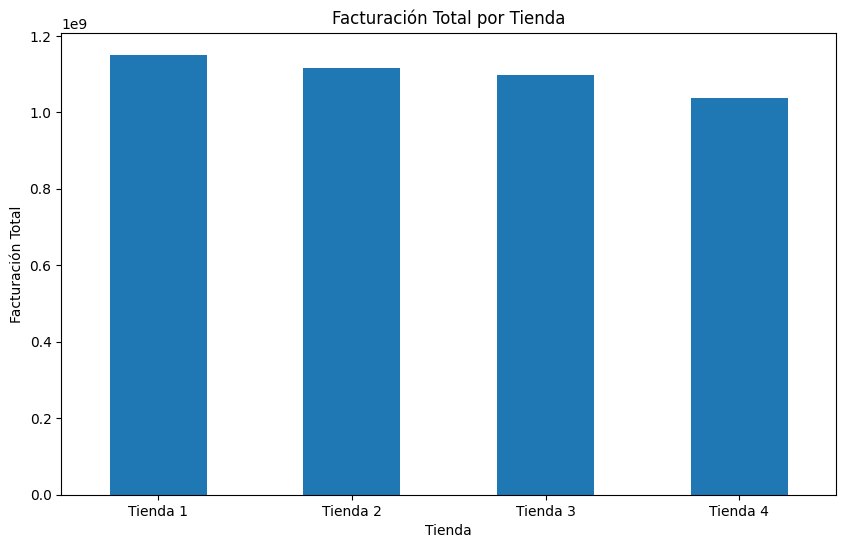

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de barras
facturacion_y_compras['Facturacion_Total'].plot(kind='bar', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [ ]:
import pandas as pd

# Agrupar por "Tienda" y "Categoría del Producto" y sumar "Precio"
ventas_por_tienda_y_categoria = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum()

# Aplicar formato con separador de miles
ventas_por_tienda_y_categoria_formateada = ventas_por_tienda_y_categoria.apply(lambda x: "{:,.0f}".format(x))

# Mostrar los resultados
print(ventas_por_tienda_y_categoria_formateada)

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar     12,698,400
          Deportes y diversión        39,290,000
          Electrodomésticos          363,685,200
          Electrónicos               429,493,500
          Instrumentos musicales      91,299,000
          Juguetes                    17,995,700
          Libros                       8,784,900
          Muebles                    187,633,700
Tienda 2  Artículos para el hogar     14,746,900
          Deportes y diversión        34,744,500
          Electrodomésticos          348,567,800
          Electrónicos               410,831,100
          Instrumentos musicales     104,990,300
          Juguetes                    15,945,400
          Libros                      10,091,200
          Muebles                    176,426,300
Tienda 3  Artículos para el hogar     15,060,000
          Deportes y diversión        35,593,100
          Electrodomésticos          329,237,900
          Electrónicos             

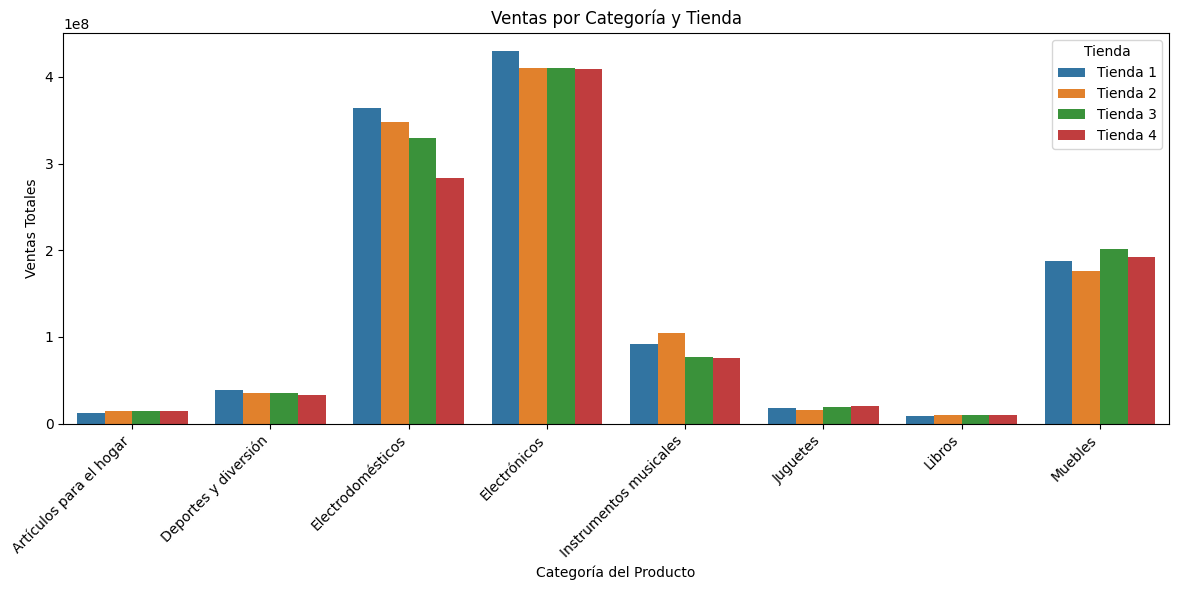

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convertir a numérico (eliminando separadores de miles)
ventas_por_tienda_y_categoria = pd.to_numeric(ventas_por_tienda_y_categoria_formateada.str.replace(',', ''))

# Resetear índice para usar seaborn
ventas_df = ventas_por_tienda_y_categoria.reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar tamaño de la figura
sns.barplot(x='Categoría del Producto', y='Precio', hue='Tienda', data=ventas_df)
plt.title('Ventas por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

<ipython-input-21-0f296d84f557>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  todas_las_tiendas['Fecha de Compra'] = pd.to_datetime(todas_las_tiendas['Fecha de Compra'])


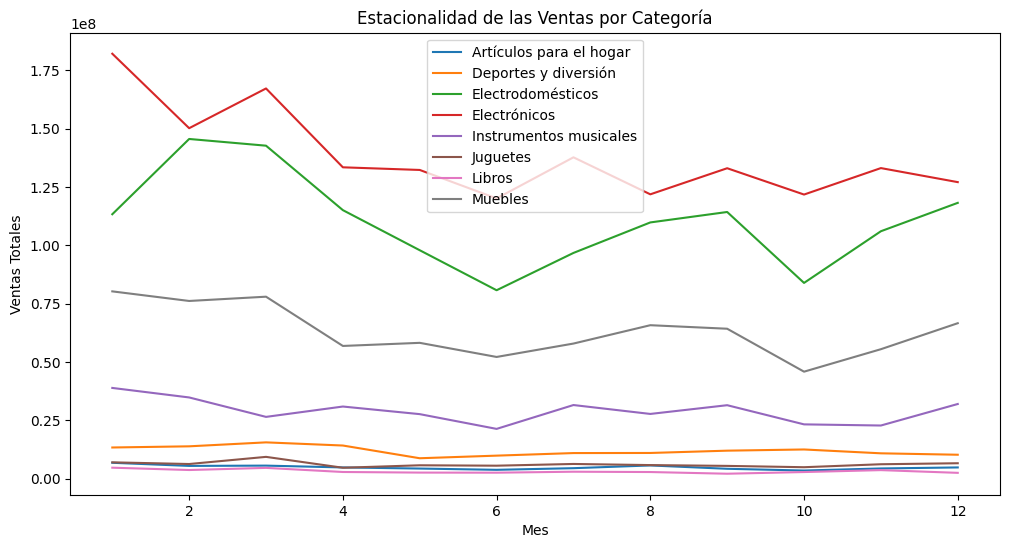

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna "Fecha de Compra" al tipo datetime
todas_las_tiendas['Fecha de Compra'] = pd.to_datetime(todas_las_tiendas['Fecha de Compra'])

# Extraer el mes de la columna "Fecha de Compra"
todas_las_tiendas['Mes'] = todas_las_tiendas['Fecha de Compra'].dt.month

# Agrupar por mes y categoría del producto, y sumar las ventas
ventas_por_mes_categoria = todas_las_tiendas.groupby(['Mes', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Crear un gráfico de líneas para visualizar la estacionalidad
fig, ax = plt.subplots(figsize=(12, 6))

for categoria in ventas_por_mes_categoria['Categoría del Producto'].unique():
    datos_categoria = ventas_por_mes_categoria[ventas_por_mes_categoria['Categoría del Producto'] == categoria]
    ax.plot(datos_categoria['Mes'], datos_categoria['Precio'], label=categoria)

ax.set_xlabel('Mes')
ax.set_ylabel('Ventas Totales')
ax.set_title('Estacionalidad de las Ventas por Categoría')
ax.legend()
plt.show()

# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64

Distribución de las calificaciones por tienda:
Calificación    1   2    3    4     5
Tienda                               
Tienda 1      319  86  218  444  1292
Tienda 2      273  93  209  482  1302
Tienda 3      297  79  193  434  1356
Tienda 4      310  85  210  453  1300

Precio promedio de los productos por tienda:
Tienda
Tienda 1    487867.910131
Tienda 2    473227.426876
Tienda 3    465459.771089
Tienda 4    440362.892282
Name: Precio, dtype: float64


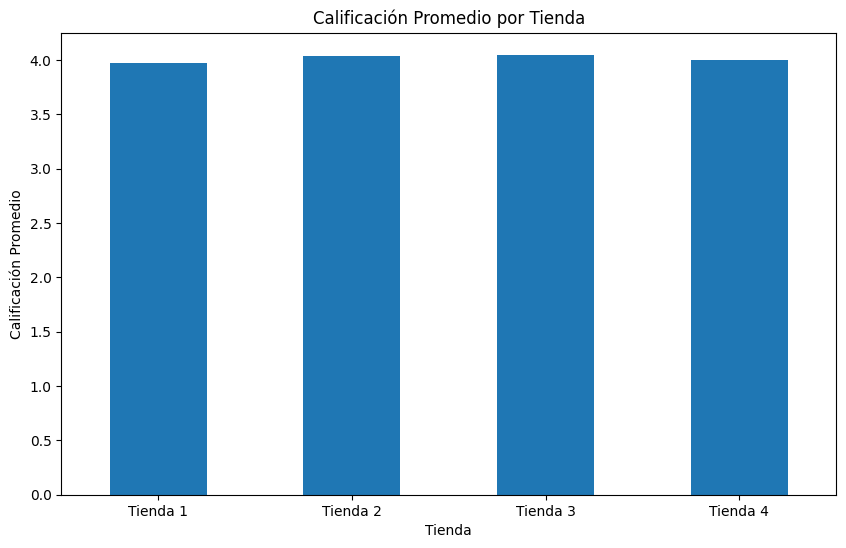

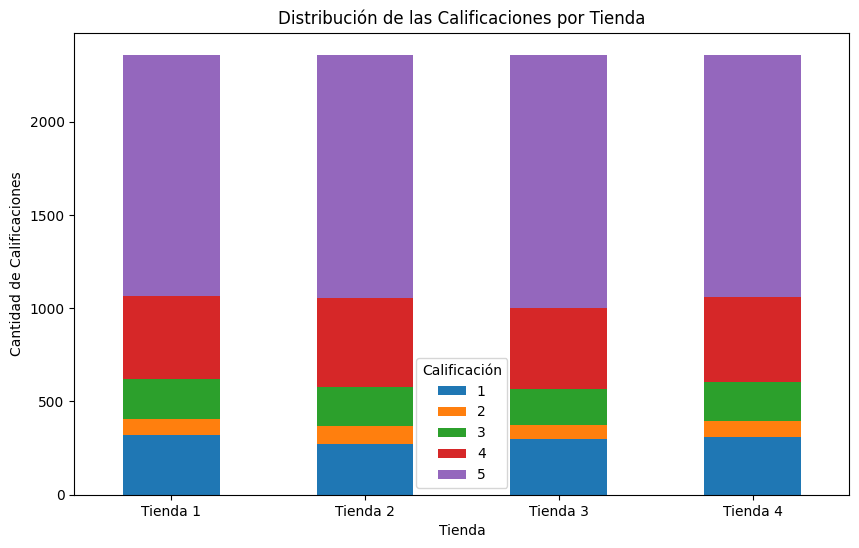

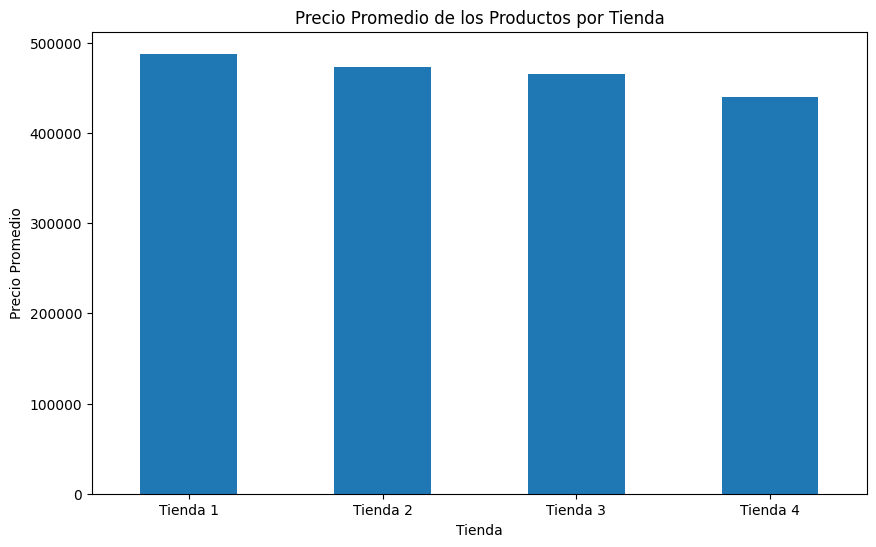

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la calificación promedio por tienda
calificaciones_promedio = todas_las_tiendas.groupby('Tienda')['Calificación'].mean()

# Calcular la distribución de las calificaciones por tienda
distribucion_calificaciones = todas_las_tiendas.groupby(['Tienda', 'Calificación'])['Calificación'].count().unstack()

# Calcular el precio promedio de los productos por tienda
precio_promedio = todas_las_tiendas.groupby('Tienda')['Precio'].mean()

# Mostrar los resultados
print("Calificación promedio por tienda:")
print(calificaciones_promedio)
print("\nDistribución de las calificaciones por tienda:")
print(distribucion_calificaciones)
print("\nPrecio promedio de los productos por tienda:")
print(precio_promedio)

# Gráfico de barras para la calificación promedio
calificaciones_promedio.plot(kind='bar', figsize=(10, 6))
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=0)
plt.show()

# Gráfico de barras para la distribución de las calificaciones
distribucion_calificaciones.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de las Calificaciones por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Calificaciones')
plt.xticks(rotation=0)
plt.legend(title='Calificación')
plt.show()

# Gráfico de barras para el precio promedio
precio_promedio.plot(kind='bar', figsize=(10, 6))
plt.title('Precio Promedio de los Productos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=0)
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd

# Agrupar por tienda y categoría del producto, y contar las ventas
ventas_por_tienda_y_categoria = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Categoría del Producto'].count().reset_index(name='Cantidad')

# Encontrar los productos más vendidos por tienda
productos_mas_vendidos = ventas_por_tienda_y_categoria.loc[ventas_por_tienda_y_categoria.groupby('Tienda')['Cantidad'].idxmax()]

# Encontrar los productos menos vendidos por tienda
productos_menos_vendidos = ventas_por_tienda_y_categoria.loc[ventas_por_tienda_y_categoria.groupby('Tienda')['Cantidad'].idxmin()]

# Mostrar los resultados
print("Productos más vendidos por tienda:")
print(productos_mas_vendidos)
print("\nProductos menos vendidos por tienda:")
print(productos_menos_vendidos)

Productos más vendidos por tienda:
      Tienda Categoría del Producto  Cantidad
7   Tienda 1                Muebles       465
15  Tienda 2                Muebles       442
23  Tienda 3                Muebles       499
31  Tienda 4                Muebles       480

Productos menos vendidos por tienda:
      Tienda   Categoría del Producto  Cantidad
0   Tienda 1  Artículos para el hogar       171
8   Tienda 2  Artículos para el hogar       181
16  Tienda 3  Artículos para el hogar       177
28  Tienda 4   Instrumentos musicales       170


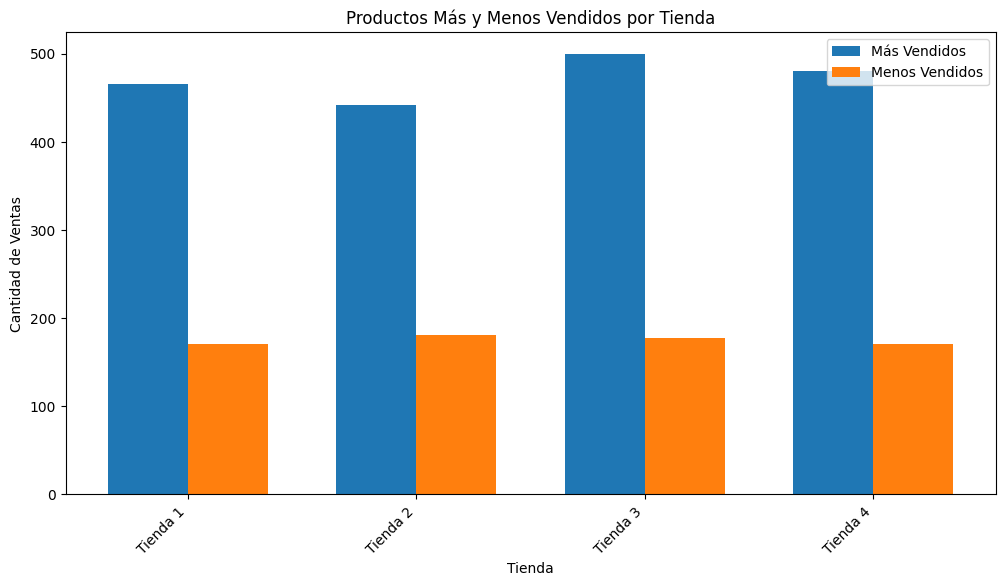

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Combinar los DataFrames de productos más y menos vendidos
productos_mas_menos_vendidos = pd.concat([productos_mas_vendidos, productos_menos_vendidos])

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar el tamaño del gráfico si es necesario

ancho_barra = 0.35  # Ajustar el ancho de las barras si es necesario

# Posiciones de las barras para los productos más vendidos
posiciones_mas_vendidos = range(len(productos_mas_vendidos))

# Posiciones de las barras para los productos menos vendidos
posiciones_menos_vendidos = [x + ancho_barra for x in posiciones_mas_vendidos]

# Barras para los productos más vendidos
ax.bar(posiciones_mas_vendidos, productos_mas_vendidos['Cantidad'], ancho_barra, label='Más Vendidos')

# Barras para los productos menos vendidos
ax.bar(posiciones_menos_vendidos, productos_menos_vendidos['Cantidad'], ancho_barra, label='Menos Vendidos')

# Etiquetas del eje x
ax.set_xticks([x + ancho_barra / 2 for x in posiciones_mas_vendidos])
ax.set_xticklabels(productos_mas_vendidos['Tienda'], rotation=45, ha='right')  # Rotar las etiquetas si es necesario

# Etiquetas de los ejes y título
ax.set_ylabel('Cantidad de Ventas')
ax.set_xlabel('Tienda')
ax.set_title('Productos Más y Menos Vendidos por Tienda')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# 5. Envío promedio por tienda

<ipython-input-32-658324c4a2dd>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        6900.0
1        8400.0
2       15900.0
3       41000.0
4       20200.0
         ...   
2353    12600.0
2354    18600.0
2355     2400.0
2356     8300.0
2357     1300.0
Name: Costo de envÃ­o, Length: 9435, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  todas_las_tiendas.iloc[:, 3] = todas_las_tiendas.iloc[:, 3].astype(str).str.strip()


Envío promedio por tienda:
         Costo de envÃ­o
Tienda                  
Tienda 1     26018.60958
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167


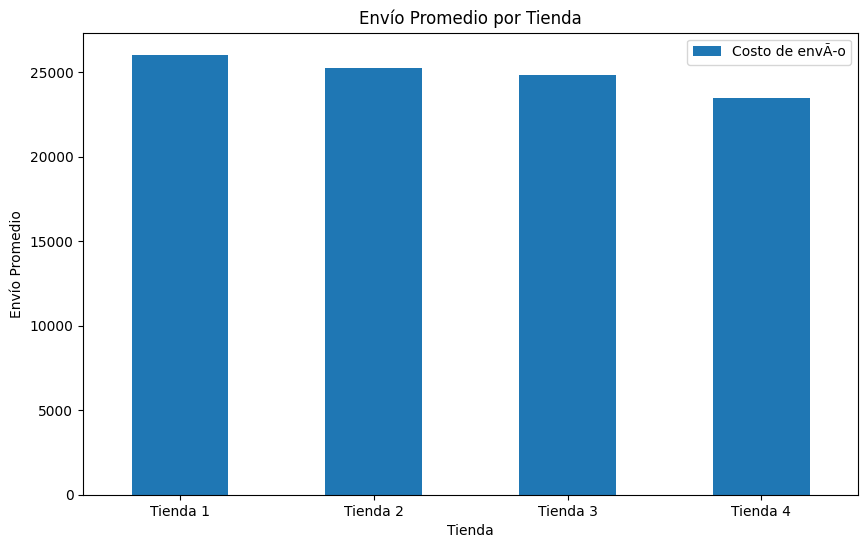

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos de cada tienda en un DataFrame, especificando la codificación si es necesario
tienda1 = pd.read_csv(url, encoding='latin-1')
tienda2 = pd.read_csv(url2, encoding='latin-1')
tienda3 = pd.read_csv(url3, encoding='latin-1')
tienda4 = pd.read_csv(url4, encoding='latin-1')

# Agregar una columna 'Tienda' para identificar cada tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los DataFrames en uno solo
todas_las_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Acceder a la columna por posición (índice 3, asumiendo que "Costo de envío" es la cuarta columna)
todas_las_tiendas.iloc[:, 3] = todas_las_tiendas.iloc[:, 3].astype(str).str.strip()
todas_las_tiendas.iloc[:, 3] = todas_las_tiendas.iloc[:, 3].str.replace(',', '.', regex=False)
todas_las_tiendas.iloc[:, 3] = pd.to_numeric(todas_las_tiendas.iloc[:, 3], errors='coerce')

# Calcular el envío promedio por tienda
envio_promedio_por_tienda = todas_las_tiendas.groupby('Tienda').agg({todas_las_tiendas.columns[3]: 'mean'})  # Usar el nombre de la columna por índice

# Imprimir los resultados
print("Envío promedio por tienda:")
print(envio_promedio_por_tienda)

# Visualizar los resultados en un gráfico de barras
envio_promedio_por_tienda.plot(kind='bar', figsize=(10, 6))
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Envío Promedio')
plt.xticks(rotation=0)
plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna "Costo de envío" sea numérica
todas_las_tiendas.iloc[:, 3] = pd.to_numeric(todas_las_tiendas.iloc[:, 3].astype(str).str.strip().str.replace(',', '.'), errors='coerce')


# 1. Análisis de facturación
facturacion_por_tienda = todas_las_tiendas.groupby('Tienda')['Precio'].sum()
print("Facturación por tienda:\n", facturacion_por_tienda)

# 2. Ventas por categorías
# Acceder a la columna por posición (índice 1)
ventas_por_categoria = todas_las_tiendas.groupby(['Tienda', todas_las_tiendas.columns[1]])['Precio'].sum()
print("\nVentas por categoría:\n", ventas_por_categoria)

# 3. Calificación promedio de la tienda
# Acceder a la columna por posición (índice 7, asumiendo que "Calificación" es la octava columna)
calificacion_promedio = todas_las_tiendas.groupby('Tienda')[todas_las_tiendas.columns[7]].mean()
print("\nCalificación promedio por tienda:\n", calificacion_promedio)

# 4. Productos más y menos vendidos
productos_vendidos = todas_las_tiendas.groupby(['Tienda', 'Producto'])['Producto'].count().reset_index(name='Cantidad')
productos_mas_vendidos = productos_vendidos.loc[productos_vendidos.groupby('Tienda')['Cantidad'].idxmax()]
productos_menos_vendidos = productos_vendidos.loc[productos_vendidos.groupby('Tienda')['Cantidad'].idxmin()]
print("\nProductos más vendidos por tienda:\n", productos_mas_vendidos)
print("\nProductos menos vendidos por tienda:\n", productos_menos_vendidos)

# 5. Costo del envío promedio por tienda
# Acceder a la columna por posición (índice 3, asumiendo que "Costo de envío" es la cuarta columna)
costo_envio_promedio = todas_las_tiendas.groupby('Tienda')[todas_las_tiendas.columns[3]].mean()
print("\nCosto del envío promedio por tienda:\n", costo_envio_promedio)


Facturación por tienda:
 Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Ventas por categoría:
 Tienda    CategorÃ­a del Producto 
Tienda 1  ArtÃ­culos para el hogar     12698400.0
          Deportes y diversiÃ³n        39290000.0
          ElectrodomÃ©sticos          363685200.0
          ElectrÃ³nicos               429493500.0
          Instrumentos musicales       91299000.0
          Juguetes                     17995700.0
          Libros                        8784900.0
          Muebles                     187633700.0
Tienda 2  ArtÃ­culos para el hogar     14746900.0
          Deportes y diversiÃ³n        34744500.0
          ElectrodomÃ©sticos          348567800.0
          ElectrÃ³nicos               410831100.0
          Instrumentos musicales      104990300.0
          Juguetes                     15945400.0
          Libros                       10091200.0
          Muebles             